In [1]:
import pandas as pd
import statistics
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import statistics as stat
from scipy.stats import binom
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Rectangle
# splitting merge_data into train test and split
from sklearn.model_selection import train_test_split, cross_validate
from scipy import stats
from scipy.stats import normaltest
import os 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')
# to keep track of training time
import datetime
# logistic regression model
from sklearn.linear_model import LogisticRegression
# metrics used for evaluation
from sklearn.metrics import f1_score, matthews_corrcoef
# visualizations
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.metrics import plot_roc_curve
# KNN imputation
from sklearn.impute import KNNImputer
# normalizer
from sklearn.preprocessing import Normalizer
# variance threshold
from sklearn.feature_selection import VarianceThreshold
# RFECV
from sklearn.model_selection import StratifiedKFold
# random forest
from sklearn.ensemble import RandomForestClassifier
# evaluation metric
from sklearn.metrics import matthews_corrcoef, make_scorer
from scipy import stats 
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split 
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.model_selection import GridSearchCV # Exhaustive search over specified parameter values for an estimator
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # to show confusion matrix
from sklearn import metrics # Evaluate ROC curve
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer
from imblearn.combine import SMOTEENN # Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours
from sklearn import decomposition
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap

Read files 

In [2]:
def read_secom():
    path ='C:/Users/duygu/OneDrive/Documents/VS_CODE_REPOS/Fault-Detection-SECOM/secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature'+str(x+1) for x in range(len(df.columns))]
    return df

#%%
def read_labels():
    path = 'C:/Users/duygu/OneDrive/Documents/VS_CODE_REPOS/Fault-Detection-SECOM/secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#read 2 df 
df_features = read_secom()
df_target = read_labels()

# Data Preparation

## Merge data

In [3]:
df= pd.concat([df_features,df_target],axis=1)

In [4]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,status,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,2008-10-16 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,2008-10-16 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,2008-10-17 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,2008-10-17 06:01:00


## Split Training and test data 

In [5]:
x = df.iloc[:,:590]
y = df.iloc[:,590]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1,stratify=y)

In [6]:
x_train.isna().sum().sum()

33219

In [7]:
x_train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
443,3079.77,2354.51,2207.0444,1269.6078,1.7571,100.0,97.0189,0.1221,1.4607,0.0155,...,0.0059,68.7444,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
760,3001.36,2491.23,2155.3111,918.2161,1.2753,100.0,105.0478,0.1227,1.4206,-0.0052,...,NaN,NaN,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
479,3042.78,2377.89,2173.4556,1433.6732,1.0304,100.0,110.5422,0.1245,1.4964,0.0204,...,NaN,NaN,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
362,3018.64,2401.80,2224.0000,1510.0797,1.5611,100.0,99.8300,0.1199,1.4428,-0.0110,...,0.0038,49.7490,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
662,3020.29,2433.99,2217.8111,1744.7771,0.9618,100.0,100.1789,0.1218,1.4950,-0.0097,...,NaN,NaN,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,3057.31,2481.53,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4830,-0.0328,...,NaN,NaN,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
821,3009.71,2565.53,2224.6778,1308.6479,1.3907,100.0,101.1333,0.1208,1.4440,-0.0079,...,NaN,NaN,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
213,3034.34,2631.47,2179.0445,2028.2208,1.5552,100.0,95.4256,0.1234,1.4281,0.0049,...,NaN,NaN,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1556,3025.21,2503.30,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3687,-0.0070,...,0.0016,46.1076,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


In [8]:
y_train2=pd.DataFrame()

## reducing dimensionality 

### remove missing values 

In [9]:
def null_values(df):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

In [10]:
x_train_na = null_values(x_train)
x_train_na

,Missing_Records,Percentage (%)
feature293,1144,91.300878
feature158,1144,91.300878
feature159,1144,91.300878
feature294,1144,91.300878
feature221,1072,85.554669
...,...,...
feature500,1,0.079808
feature367,1,0.079808
feature377,1,0.079808
feature378,1,0.079808


In [11]:
miss_threshold=80
x_train_na= x_train_na[x_train_na["Percentage (%)"] > miss_threshold]
x_train_na

,Missing_Records,Percentage (%)
feature293,1144,91.300878
feature158,1144,91.300878
feature159,1144,91.300878
feature294,1144,91.300878
feature221,1072,85.554669
feature86,1072,85.554669
feature359,1072,85.554669
feature493,1072,85.554669


In [12]:
x_train_new = x_train.drop(axis=1, columns=x_train_na.index)
x_train_new.shape

(1253, 582)

### removing constant voltality

In [13]:
x_train_new_eda= x_train_new.describe().T
x_train_new_eda

,count,mean,std,min,25%,50%,75%,max
feature1,1248.0,3014.113686,73.877303,2743.2400,2966.2300,3011.40500,3056.310000,3356.3500
feature2,1247.0,2496.400585,79.188651,2162.8700,2452.3350,2500.38000,2539.600000,2846.4400
feature3,1243.0,2200.216525,29.939025,2060.6600,2180.8611,2200.98890,2218.055500,2315.2667
feature4,1243.0,1394.907987,436.632421,0.0000,1083.8858,1283.43680,1593.122000,3715.0417
feature5,1243.0,4.018582,54.572445,0.6815,1.0160,1.31710,1.525700,1114.5366
...,...,...,...,...,...,...,...,...
feature586,1252.0,3.084501,3.968128,1.1975,2.3058,2.74655,3.258475,99.3032
feature587,1252.0,0.021521,0.012421,-0.0060,0.0134,0.02070,0.027600,0.1028
feature588,1252.0,0.016344,0.008698,0.0042,0.0106,0.01480,0.019800,0.0799
feature589,1252.0,0.005248,0.002850,0.0012,0.0033,0.00460,0.006300,0.0286


In [14]:
x_train_new_eda[x_train_new_eda['std']==0]
x_train_new_std= x_train_new_eda[x_train_new_eda["std"] == 0]
x_train_new_std

,count,mean,std,min,25%,50%,75%,max
feature6,1243.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
feature14,1251.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature43,1253.0,70.0,0.0,70.0,70.0,70.0,70.0,70.0
feature50,1253.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
feature53,1253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
feature535,1247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature536,1247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature537,1247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature538,1247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
x_train_new_2 = x_train_new.drop(axis=1, columns=x_train_new_std.index)
x_train_new_2.shape

(1253, 466)

## Outlier Treatment

In [16]:
x_train_3s=x_train_new_2.copy()

In [17]:
def zscore(df,cols,thr):
    for col in cols:
        mean=df[col].mean()
        std=df[col].std()
        upper_bound=mean+ thr*std
        lower_bound=mean- thr*std
        df[col]=np.where(df[col]>upper_bound,upper_bound,np.where(df[col]<lower_bound,lower_bound,df[col]))

In [18]:
zscore(x_train_3s,x_train_3s.columns,3)

# Checking

In [19]:
x_train_new_2['feature4'].mean()

1394.907986725665

In [20]:

x_train_new_2['feature4'].std()

436.63242083048897

In [21]:
x_train_new_2['feature4'].mean()+3*x_train_new_2['feature4'].std()

2704.805249217132

In [22]:
x_train_new_2['feature4'].max()

3715.0417

In [23]:
x_train_3s['feature4'].max()


2704.805249217132

## Imputation

### KNN Imputation

In [24]:
# with fit_transform we already scaled data.
#scaler = MinMaxScaler()
#x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_3s), columns=x_train_3s.columns)
#x_train_scaled

In [25]:
# impute missing values and save it as a temporary dataset.
knn = KNNImputer()
knn.fit(x_train_3s)
imputed_train = pd.DataFrame(knn.transform(x_train_3s), columns = x_train_3s.columns)

In [26]:
imputed_train

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3079.77,2354.51,2207.0444,1269.607800,1.7571,97.018900,0.1221,1.4607,0.0155,0.0093,...,0.00590,68.74440,0.5001,0.0110,0.0034,2.1899,0.0282,0.0194,0.0059,68.7444
1,3001.36,2491.23,2155.3111,918.216100,1.2753,105.047800,0.1227,1.4206,-0.0052,0.0010,...,0.00720,63.99824,0.4943,0.0199,0.0042,4.0318,0.0169,0.0276,0.0081,163.9998
2,3042.78,2377.89,2173.4556,1433.673200,1.0304,110.542200,0.1245,1.4964,0.0204,0.0133,...,0.00330,72.86980,0.4962,0.0114,0.0034,2.2877,0.0208,0.0287,0.0091,138.2861
3,3018.64,2401.80,2224.0000,1510.079700,1.5611,99.830000,0.1199,1.4428,-0.0110,0.0101,...,0.00380,49.74900,0.5047,0.0101,0.0031,1.9927,0.0284,0.0141,0.0038,49.7490
4,3020.29,2433.99,2217.8111,1744.777100,0.9618,100.178900,0.1218,1.4950,-0.0097,-0.0054,...,0.00540,69.47592,0.5010,0.0147,0.0036,2.9338,0.0165,0.0114,0.0043,68.9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,3057.31,2481.53,2214.9333,1663.702400,1.0203,100.445600,0.1247,1.4830,-0.0328,0.0048,...,0.00480,55.49078,0.5037,0.0175,0.0039,3.4736,0.0263,0.0117,0.0033,44.3686
1249,3009.71,2565.53,2224.6778,1308.647900,1.3907,101.133300,0.1208,1.4440,-0.0079,-0.0076,...,0.00484,151.46970,0.4979,0.0078,0.0024,1.5724,0.0275,0.0215,0.0076,78.1199
1250,3034.34,2631.47,2179.0445,2028.220800,1.5552,95.425600,0.1234,1.4281,0.0049,0.0092,...,0.00436,84.81790,0.4968,0.0128,0.0035,2.5829,0.0298,0.0116,0.0039,38.9781
1251,3025.21,2503.30,2179.7333,2704.805249,1.4843,82.357569,0.1248,1.3687,-0.0070,-0.0033,...,0.00160,46.10760,0.5019,0.0158,0.0043,3.1428,0.0120,0.0055,0.0016,46.1076


# Checking

In [27]:
imputed_train.isna().sum().sum()

0

In [28]:
#retransformed_train= pd.DataFrame(scaler.inverse_transform(imputed_train), columns=imputed_train.columns)

## Feature Selection

### BORUTA

In [8]:
#Boruta function
which_model = ['RandomForestClassifier', 'XGB']


list_of_list_dict = [ [ {                   'n_jobs':         -1, 
                                            'class_weight':   'balanced_subsample',
                                            'max_depth':      5,
                                            'random_state':   100
                                        },

                                    {       'n_jobs':         -1, 
                                            'class_weight':   'balanced_subsample',
                                            'max_depth':      7,
                                            'random_state':   100
                                        },

                                    {       'n_jobs':         -1, 
                                            'class_weight':   'balanced_subsample',
                                            'max_depth':      9,
                                            'random_state':   100
                                                        }
                                    ],

                    [ {                     'a':   100, 
                                            'b':   'a',
                                            'c':   111,
                                            'd':   100
                                        },

                                    {       'a':    3333, 
                                            'b':   'b',
                                            'c':   555,
                                            'd':   100
                                        }
                                        ]
                    ]

for m in which_model:
    if m=='RandomForestClassifier': 
        for p in list_of_list_dict[0]:
            print(m,'_',p)
            X_train = BorutaFeatureSelection(X, y, m, p)
            print(X_train.columns)
    if m=='XGB': 
        for p in list_of_list_dict[1]:
            print(m,'_',p)
            X_train = BorutaFeatureSelection(X, y, m, p)
            print(X_train.columns)



RandomForestClassifier _ {'n_jobs': -1, 'class_weight': 'balanced_subsample', 'max_depth': 5, 'random_state': 100}
RandomForestClassifier _ {'n_jobs': -1, 'class_weight': 'balanced_subsample', 'max_depth': 7, 'random_state': 100}
RandomForestClassifier _ {'n_jobs': -1, 'class_weight': 'balanced_subsample', 'max_depth': 9, 'random_state': 100}
XGB _ {'a': 100, 'b': 'a', 'c': 111, 'd': 100}
XGB _ {'a': 3333, 'b': 'b', 'c': 555, 'd': 100}


In [10]:
#Boruta function
which_model = ['RandomForestClassifier', 'XGB']


list_dict_RF = [ {                   'n_jobs':         -1, 
                                            'class_weight':   'balanced_subsample',
                                            'max_depth':      5,
                                            'random_state':   100
                                        },

                                    {       'n_jobs':         -1, 
                                            'class_weight':   'balanced_subsample',
                                            'max_depth':      7,
                                            'random_state':   100
                                        },

                                    {       'n_jobs':         -1, 
                                            'class_weight':   'balanced_subsample',
                                            'max_depth':      9,
                                            'random_state':   100
                                                        }
                                    ]
#-------------------
list_dict_XGB =                    [ {                     'a':   100, 
                                            'b':   'a',
                                            'c':   111,
                                            'd':   100
                                        },

                                    {       'a':    3333, 
                                            'b':   'b',
                                            'c':   555,
                                            'd':   100
                                        }
                                        ]
                    

for m in which_model:
    if m=='RandomForestClassifier': 
        for p in list_dict_RF:
            print(m,'_',p)
            #X_train = BorutaFeatureSelection(X, y, m, p)
            #print(X_train.columns)
    if m=='XGB': 
        for p in list_dict_XGB:
            print(m,'_',p)
            #X_train = BorutaFeatureSelection(X, y, m, p)
            #print(X_train.columns)



RandomForestClassifier _ {'n_jobs': -1, 'class_weight': 'balanced_subsample', 'max_depth': 5, 'random_state': 100}
RandomForestClassifier _ {'n_jobs': -1, 'class_weight': 'balanced_subsample', 'max_depth': 7, 'random_state': 100}
RandomForestClassifier _ {'n_jobs': -1, 'class_weight': 'balanced_subsample', 'max_depth': 9, 'random_state': 100}
XGB _ {'a': 100, 'b': 'a', 'c': 111, 'd': 100}
XGB _ {'a': 3333, 'b': 'b', 'c': 555, 'd': 100}


In [76]:
#Boruta function
which_model = ['RandomForestClassifier', 'XGB']

model_params = {   n_jobs:         -1, 
                        class_weight:   'balanced_subsample',
                        max_depth:      5,
                        random_state:   100
                     }


random=5, width=10

def BorutaFeatureSelection(X, y, which_model, model_params) :

    if which_model == 'RandomForestClassifier':
        model = RandomForestClassifier(X,y,**model_params)
    elif which_model == 'XGB':
        model = XGB(X,y**model_params)




    #--------------------------
    feature_names = np.array(X.columns)
    model.fit(X, y)
    # define Boruta feature selection method
    feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=100, max_iter=100)

    # find all relevant features
    feature_selector.fit(X.to_numpy(),y)

    # check selected features
    feature_selector.support_

    # check ranking of features
    feature_selector.ranking_

    # zip feature names, ranks, and decisions 
    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    # print the results
    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.ranking_ <= 1)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
    # call transform() on X to filter it down to selected features
    #--------------------------


    return pd.DataFrame(X.filter(final_features)) , final_features

In [77]:
# apply Boruta and store selected features in a variable
X_train , final_features = BorutaFeatureSelection(imputed_train,y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	449
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	16
Rejected: 	449
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	16
Rejected: 	449
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	16
Rejected: 	449
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	16
Rejected: 	449
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	16
Rejected: 	449
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	16
Rejected: 	449
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	16
Rejected: 	449
Iteration: 	16 / 100
Confirmed: 	4
Tentat

In [79]:
final_features

['feature1',
 'feature20',
 'feature22',
 'feature34',
 'feature60',
 'feature122',
 'feature131',
 'feature154',
 'feature206',
 'feature248',
 'feature342',
 'feature349',
 'feature478',
 'feature520']

In [80]:
#green_area = retransformed_train.columns[feat_selector.support_].to_list()
#blue_area = retransformed_train.columns[feat_selector.ranking_].to_list()

In [ ]:
#important features after boruta
X_train

,feature1,feature20,feature22,feature34,feature60,feature122,feature131,feature154,feature206,feature248,feature342,feature349,feature478,feature520
0,3079.77,12.3686,-4750.75,8.6915,0.6991,15.76,0.8203,0.0127,9.22,0.015200,2.6547,0.02370,6.0266,3.292400
1,3001.36,12.4959,-5410.75,8.3006,-1.4173,15.76,0.8291,0.0065,7.31,0.054460,2.0989,0.02720,4.8218,11.584860
2,3042.78,12.5553,-6456.75,8.7418,10.2355,15.65,0.5438,0.0148,8.80,0.034500,2.5012,0.01630,6.1589,7.439200
3,3018.64,12.4469,-5775.00,8.6829,9.8518,15.73,0.8048,0.0159,7.77,0.260816,2.4329,0.03000,5.0612,61.263283
4,3020.29,12.4618,-6900.50,8.5891,1.0336,15.90,0.7611,0.0078,11.06,0.034680,3.2653,0.02430,7.4828,7.412560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,3057.31,12.4824,-6451.75,9.1156,3.2964,15.96,0.7527,0.0091,6.83,0.032820,1.8996,0.02640,4.6390,7.059080
1249,3009.71,12.5280,-5470.25,8.4278,3.0345,15.79,0.7217,0.0055,9.58,0.020300,2.7085,0.01830,6.6740,4.373000
1250,3034.34,12.6278,-5972.75,8.5155,11.4855,15.94,0.8380,0.0177,9.74,0.138300,3.1945,0.02680,6.3958,29.569300
1251,3025.21,12.5373,-5735.25,9.0650,-2.3109,15.69,0.5768,0.0137,6.56,0.024160,1.9995,0.02106,4.3482,5.177020


<AxesSubplot:>

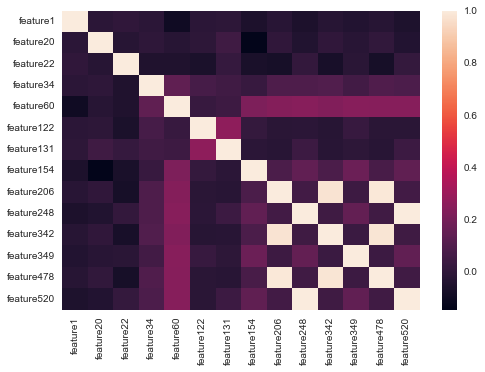

In [ ]:
X_train.corr()
sns.heatmap(X_train.corr())

In [ ]:
import scipy as sp
from tqdm.notebook import tqdm

Boruta Shap

In [ ]:
from BorutaShap import BorutaShap#


In [ ]:
Feature_Selector3 = BorutaShap(importance_measure='gain', classification=True)

Feature_Selector3.fit(X=imputed_train, y=y_train, n_trials=10, random_state=0)

  0%|          | 0/10 [00:01<?, ?it/s]


ValueError: No Importance_measure was specified select one of (shap, gini)

RFE Feature selection


In [101]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


In [102]:
#RFE function

def RFEFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5, random_state=100)
    model.fit(X, y)

    # define RFE feature selection method
    rfe = RFE(estimator = model,n_features_to_select = 15)

    # find all relevant features
    rfe.fit(X,y)

    # check selected features
    rfe.support_

    # check ranking of features
    rfe.ranking_

    # zip feature names, ranks, and decisions 
    feature_ranks = list(zip(feature_names, 
                             rfe.ranking_, 
                             rfe.support_))

    # print the results
    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features_rfe = list()
    indexes = np.where(rfe.ranking_ <= 1)
    for x in np.nditer(indexes):
        final_features_rfe.append(feature_names[x])
    print(final_features_rfe)
    
 # call transform() on X to filter it down to selected features
    return pd.DataFrame(X.filter(final_features_rfe)) , final_features_rfe

In [103]:
# apply RFE and store selected features in a variable
X_train_rfe, final_features_rfe = RFEFeatureSelection(imputed_train,y_train)

Feature: feature1                       Rank: 1,  Keep: True
Feature: feature2                       Rank: 400,  Keep: False
Feature: feature3                       Rank: 381,  Keep: False
Feature: feature4                       Rank: 121,  Keep: False
Feature: feature5                       Rank: 314,  Keep: False
Feature: feature7                       Rank: 199,  Keep: False
Feature: feature8                       Rank: 175,  Keep: False
Feature: feature9                       Rank: 27,  Keep: False
Feature: feature10                      Rank: 308,  Keep: False
Feature: feature11                      Rank: 217,  Keep: False
Feature: feature12                      Rank: 194,  Keep: False
Feature: feature13                      Rank: 92,  Keep: False
Feature: feature15                      Rank: 54,  Keep: False
Feature: feature16                      Rank: 214,  Keep: False
Feature: feature17                      Rank: 17,  Keep: False
Feature: feature18                      Rank: 6

In [104]:
X_train_rfe


,feature1,feature20,feature32,feature34,feature60,feature122,feature130,feature131,feature206,feature248,feature342,feature427,feature461,feature478,feature520
0,3079.77,12.3686,3.3618,8.6915,0.6991,15.76,0.0000,0.8203,9.22,0.015200,2.6547,1.3155,14.7554,6.0266,3.292400
1,3001.36,12.4959,3.3500,8.3006,-1.4173,15.76,0.2838,0.8291,7.31,0.054460,2.0989,0.6593,12.1570,4.8218,11.584860
2,3042.78,12.5553,4.6781,8.7418,10.2355,15.65,-0.2838,0.5438,8.80,0.034500,2.5012,1.5403,21.1169,6.1589,7.439200
3,3018.64,12.4469,3.4767,8.6829,9.8518,15.73,0.0473,0.8048,7.77,0.260816,2.4329,1.6422,41.7748,5.0612,61.263283
4,3020.29,12.4618,4.6303,8.5891,1.0336,15.90,0.4258,0.7611,11.06,0.034680,3.2653,0.8006,23.1457,7.4828,7.412560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,3057.31,12.4824,4.5974,9.1156,3.2964,15.96,-0.9461,0.7527,6.83,0.032820,1.8996,0.9383,18.4257,4.6390,7.059080
1249,3009.71,12.5280,3.3153,8.4278,3.0345,15.79,-0.4258,0.7217,9.58,0.020300,2.7085,0.5571,31.6124,6.6740,4.373000
1250,3034.34,12.6278,3.3313,8.5155,11.4855,15.94,0.5677,0.8380,9.74,0.138300,3.1945,1.8298,60.3473,6.3958,29.569300
1251,3025.21,12.5373,3.3359,9.0650,-2.3109,15.69,0.0000,0.5768,6.56,0.024160,1.9995,1.4074,16.9711,4.3482,5.177020


<AxesSubplot:>

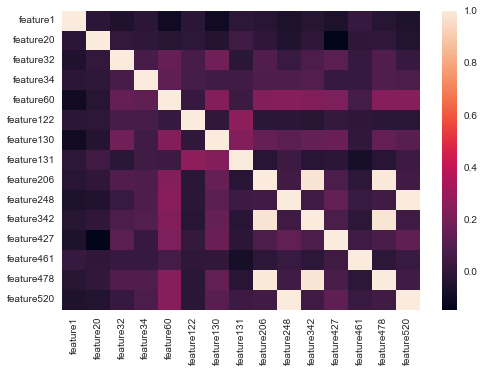

In [105]:
X_train_rfe.corr()
sns.heatmap(X_train_rfe.corr())

In [131]:
#RFECV function

def RFECVFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5, random_state=100)
    model.fit(X, y)

    # define RFE feature selection method
    rfeCV = RFECV(estimator = model,min_features_to_select = 10)

    # find all relevant features
    rfeCV.fit(X,y)

    # check selected features
    rfeCV.support_

    # check ranking of features
    rfeCV.ranking_

    # zip feature names, ranks, and decisions 
    feature_ranks = list(zip(feature_names, 
                             rfeCV.ranking_, 
                             rfeCV.support_))

    # print the results
    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features_rfeCV = list()
    indexes = np.where(rfeCV.ranking_ <= 1)
    for x in np.nditer(indexes):
        final_features_rfeCV.append(feature_names[x])
    print(final_features_rfeCV)
    
 # call transform() on X to filter it down to selected features
    return pd.DataFrame(X.filter(final_features_rfeCV)) , final_features_rfeCV

In [132]:
# apply RFE and store selected features in a variable
X_train_rfeCV , final_features_rfeCV = RFECVFeatureSelection(imputed_train,y_train)

Feature: feature1                       Rank: 1,  Keep: True
Feature: feature2                       Rank: 81,  Keep: False
Feature: feature3                       Rank: 62,  Keep: False
Feature: feature4                       Rank: 1,  Keep: True
Feature: feature5                       Rank: 1,  Keep: True
Feature: feature7                       Rank: 1,  Keep: True
Feature: feature8                       Rank: 1,  Keep: True
Feature: feature9                       Rank: 1,  Keep: True
Feature: feature10                      Rank: 1,  Keep: True
Feature: feature11                      Rank: 1,  Keep: True
Feature: feature12                      Rank: 1,  Keep: True
Feature: feature13                      Rank: 1,  Keep: True
Feature: feature15                      Rank: 1,  Keep: True
Feature: feature16                      Rank: 1,  Keep: True
Feature: feature17                      Rank: 1,  Keep: True
Feature: feature18                      Rank: 1,  Keep: True
Feature: feature19  

In [133]:
X_train_rfeCV 

,feature1,feature4,feature5,feature7,feature8,feature9,feature10,feature11,feature12,feature13,...,feature575,feature576,feature578,feature579,feature582,feature583,feature584,feature585,feature586,feature588
0,3079.77,1269.607800,1.7571,97.018900,0.1221,1.4607,0.0155,0.0093,0.9577,198.5381,...,60.9374,0.2519,24.5741,0.028200,68.74440,0.5001,0.0110,0.0034,2.1899,0.0194
1,3001.36,918.216100,1.2753,105.047800,0.1227,1.4206,-0.0052,0.0010,0.9649,203.8512,...,3.1887,0.0581,7.8563,0.035613,63.99824,0.4943,0.0199,0.0042,4.0318,0.0276
2,3042.78,1433.673200,1.0304,110.542200,0.1245,1.4964,0.0204,0.0133,0.9486,197.4142,...,3.4013,0.0934,14.6788,0.018020,72.86980,0.4962,0.0114,0.0034,2.2877,0.0287
3,3018.64,1510.079700,1.5611,99.830000,0.1199,1.4428,-0.0110,0.0101,0.9501,199.1920,...,3.6888,0.0892,12.0929,0.028400,49.74900,0.5047,0.0101,0.0031,1.9927,0.0141
4,3020.29,1744.777100,0.9618,100.178900,0.1218,1.4950,-0.0097,-0.0054,0.9679,201.6603,...,2.4093,0.0788,13.1210,0.025480,69.47592,0.5010,0.0147,0.0036,2.9338,0.0114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,3057.31,1663.702400,1.0203,100.445600,0.1247,1.4830,-0.0328,0.0048,0.9663,197.7390,...,3.2513,0.0801,9.9246,0.026380,55.49078,0.5037,0.0175,0.0039,3.4736,0.0117
1249,3009.71,1308.647900,1.3907,101.133300,0.1208,1.4440,-0.0079,-0.0076,0.9673,198.9233,...,3.4596,0.0944,14.8682,0.017100,151.46970,0.4979,0.0078,0.0024,1.5724,0.0215
1250,3034.34,2028.220800,1.5552,95.425600,0.1234,1.4281,0.0049,0.0092,0.9452,204.2667,...,3.4068,0.0483,10.8388,0.021000,84.81790,0.4968,0.0128,0.0035,2.5829,0.0116
1251,3025.21,2704.805249,1.4843,82.357569,0.1248,1.3687,-0.0070,-0.0033,0.9616,203.7470,...,4.4650,0.0927,15.5905,0.012000,46.10760,0.5019,0.0158,0.0043,3.1428,0.0055


In [134]:
#visualization for RFE
#from yellowbrick.model_selection import RFECV
#cv = StratifiedKFold(5)
#visualizer = RFECV(RandomForestClassifier(), cv=cv,scoring='f1_weighted')

#visualizer.fit(retransformed_train, y_train)        # Fit the data to the visualizer
#visualizer.show()           # Finalize and render the figure

## Lasso Feature selection

In [135]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [136]:
feature_names=np.array(imputed_train.columns)

In [137]:
pipeline = Pipeline([
                     ('scaler',MinMaxScaler()),
                     ('model',Lasso())
])

In [138]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [139]:
search.fit(imputed_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.309 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.253 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.253 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.281 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.145 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.309 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.253 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.253 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.281 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.145 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.309 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [140]:
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance
np.array(feature_names)[importance > 0]

array([], dtype=object)

Sampling

In [141]:
def Sampling(x_train, y_train, sampler):
    
    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE(random_state=100)    
    
    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=100, shrinkage=1)

    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN(random_state=100)
    

    #SMOTTEENN
    if sampler == 'SMOTEENN' :
        sampler = SMOTEENN(random_state=100)
        
        
    #Random under Sampling
    if sampler == "randomunder":
        sampler = RandomUnderSampler(random_state=100)

    X_resampled, y_resampled = sampler.fit_resample(x_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled

In [142]:
# Imbalance treatment
X_resampled, y_resampled = Sampling(X_train, y_train,'SMOTE')

Counter({-1: 1170, 1: 1170})


In [143]:
y_resampled

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2335    1
2336    1
2337    1
2338    1
2339    1
Name: status, Length: 2340, dtype: int64

TEST DATASET

In [144]:
#descriptive analysis
def eda(df,output):
    #output={}
    for col in df.columns:
        mean=df[col].mean()
        std= df[col].std()
        percent_null= pd.isnull(df[col]).sum()/len(df[col])*100
        unique=len(pd.unique(df[col]))
        outlier_df3= df[(np.abs(stats.zscore(df[col])) > 3)]
        outlier_df2= df[(np.abs(stats.zscore(df[col])) > 2)]
        count_3s_perc=len(outlier_df3)*100/len(df)
        count_2s_perc=(len(outlier_df2)-len(outlier_df3))*100/len(df)
        min= df[col].min()
        q25=df[col].quantile(0.25)
        q50=df[col].quantile(0.5)
        q75=df[col].quantile(0.75)
        max= df[col].max()
        skewness=df[col].skew()
        kurtosis=df[col].kurtosis()
        list = []
        list.append(mean)
        list.append(std)
        list.append(percent_null)
        list.append(unique)
        list.append(count_3s_perc)
        list.append(count_2s_perc)
        list.append(min)
        list.append(q25)
        list.append(q50)
        list.append(q75)
        list.append(max)
        list.append(skewness)
        list.append(kurtosis)
        output[col] = list
    return output;

In [145]:
x_test_na = null_values(x_test)
x_test_na

,Missing_Records,Percentage (%)
feature294,285,90.764331
feature293,285,90.764331
feature159,285,90.764331
feature158,285,90.764331
feature493,269,85.668790
...,...,...
feature283,1,0.318471
feature284,1,0.318471
feature285,1,0.318471
feature2,1,0.318471


In [146]:
x_test_na= x_test_na[x_test_na["Percentage (%)"] > 80]
x_test_na

,Missing_Records,Percentage (%)
feature294,285,90.764331
feature293,285,90.764331
feature159,285,90.764331
feature158,285,90.764331
feature493,269,85.668790
feature359,269,85.668790
feature221,269,85.668790
feature86,269,85.668790


In [147]:
x_test_new = x_test.drop(axis=1, columns=x_test_na.index)
x_test_new.shape

(314, 582)

In [148]:
x_test_new
##proceeding with only training data 
#analysis of volatility and null values of training data 
#xtrain_desc = x_train.describe()
x_test_new_eda={}
x_test_new_eda=eda(x_test_new,x_test_new_eda)
x_test_new_eda1=pd.DataFrame.from_dict(x_test_new_eda,orient='index')
x_test_new_eda1.columns=['mean','std', 'percent_null', 'unique', 'count_3s', 'count_2s', 'min', 'q25', 'q50', 'q75', 'max','skewness','kurtosis']
#Percent_null of features before split 
#sns.histplot(data=result1, x='percent_null',bins=20, kde=True)
x_test_new_eda1

,mean,std,percent_null,unique,count_3s,count_2s,min,q25,q50,q75,max,skewness,kurtosis
feature1,3015.805399,72.695332,0.318471,314,0.000000,0.000000,2787.4900,2968.330000,3011.84000,3057.56000,3266.5500,0.392153,1.009080
feature2,2493.657604,85.188422,0.318471,310,0.000000,0.000000,2158.7500,2452.280000,2492.81000,2535.71000,2809.7900,-0.007244,2.102846
feature3,2201.873688,27.746567,1.273885,228,0.000000,0.000000,2117.5889,2183.449975,2201.35000,2218.42775,2315.2667,0.161078,0.825308
feature4,1402.265403,462.104127,1.273885,228,0.000000,0.000000,847.7976,1079.924825,1287.88445,1586.94760,3619.7397,2.058669,6.184798
feature5,4.912465,63.092033,1.273885,227,0.000000,0.000000,0.7217,1.020325,1.30010,1.52960,1112.1600,17.605908,309.978581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature586,3.001342,1.035471,0.000000,314,2.229299,0.955414,1.4716,2.323425,2.79330,3.43675,8.8160,2.166765,7.755072
feature587,0.021208,0.012121,0.000000,177,0.955414,4.458599,-0.0169,0.014000,0.01995,0.02750,0.0831,0.863569,3.426609
feature588,0.016996,0.009225,0.000000,153,1.273885,2.866242,0.0032,0.010400,0.01500,0.02120,0.0651,1.485789,3.590882
feature589,0.005425,0.002935,0.000000,87,1.592357,3.184713,0.0010,0.003300,0.00485,0.00675,0.0212,1.639023,4.481107


In [149]:
x_test_new_eda1[x_test_new_eda1['std']==0]
x_test_new_std= x_test_new_eda1[x_test_new_eda1["std"] == 0]
x_test_new_std

,mean,std,percent_null,unique,count_3s,count_2s,min,q25,q50,q75,max,skewness,kurtosis
feature6,100.0,0.0,1.273885,2,0.0,0.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0
feature14,0.0,0.0,0.318471,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature43,70.0,0.0,0.318471,2,0.0,0.0,70.0,70.0,70.0,70.0,70.0,0.0,0.0
feature50,1.0,0.0,0.318471,2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
feature53,0.0,0.0,0.318471,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature535,0.0,0.0,0.955414,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature536,0.0,0.0,0.955414,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature537,0.0,0.0,0.955414,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feature538,0.0,0.0,0.955414,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
x_test_new_2 = x_test_new.drop(axis=1, columns=x_test_new_std.index)
x_test_new_2.shape

(314, 460)

In [151]:
x_test_3s=x_test_new_2.copy()

In [152]:
zscore(x_test_3s,x_test_3s.columns,3)

In [153]:
imputed_test = pd.DataFrame(knn.transform(x_test_3s), columns = x_test_3s.columns)

ValueError: X has 460 features, but KNNImputer is expecting 466 features as input.

model building

In [ ]:
def run_model(X, y,X_test,y_test):
    rf_boruta = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
    rf_boruta.fit(X,y)
    y_predicted_test= rf_boruta.predict(X_test)
    score1= accuracy_score(y_test, y_predicted_test)
    return score1
